# Content Based Image Recommendation

Content Based Image Recommendation or CBIR is a new way of Search Engine which enables a user to Search for similar images over the network with the help of images directly. 

**Clone the Github Repository to Google Colab along with the Dataset.**

In [1]:
!git clone https://github.com/thegreatgupta/CBIR.git

Cloning into 'CBIR'...
remote: Enumerating objects: 60196, done.
remote: Total 60196 (delta 0), reused 0 (delta 0), pack-reused 60196
Receiving objects: 100% (60196/60196), 220.64 MiB | 9.28 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Checking out files: 100% (60233/60233), done.


In [2]:
!ls

CBIR  sample_data


In [1]:
cd CBIR

/content/CBIR


In [4]:
!ls

Backup		     CBIR_Colab_05.ipynb	   model_evaluation.py
CBIR_01.ipynb	     CBIR_Model_Weight_ep40_01.h5  model_trail.py
CBIR_Colab_01.ipynb  dataset			   model_training.py
CBIR_Colab_02.ipynb  json_model.json		   README.md
CBIR_Colab_03.ipynb  LICENSE			   weight.h5
CBIR_Colab_04.ipynb  model


### Import Required Packages

In [2]:
import pandas as pd
import numpy as np
import cv2
import os
import keras
import matplotlib.pyplot as plt
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense,GlobalAveragePooling2D, Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
from keras.models import Model, load_model
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
import numpy as np
from sklearn.preprocessing import OneHotEncoder

#### Step - 1 : Data Preprocessing

In [0]:
#BASE_PATH = 'F:/GIT/CBIR/'
BASE_PATH = ''
annotation = pd.read_csv(BASE_PATH + 'dataset/annotation.txt', delimiter='\t') 

In [5]:
annotation.head()

,filename,color,micro_category,macro_category,macro_category(english),Unnamed: 5,Unnamed: 6,Unnamed: 7
0,35154736FEF.jpg,BRONZO,GONNA PELLE,ABBIGLIAMENTO PELLE,leather,NaN,NaN,NaN
1,35157444XDF.jpg,PLATINO,GONNA PELLE,ABBIGLIAMENTO PELLE,leather,NaN,NaN,NaN
2,35157749QFF.jpg,NOCCIOLA,GONNA PELLE,ABBIGLIAMENTO PELLE,leather,NaN,NaN,NaN
3,35165506NDF.jpg,ORO,GONNA PELLE,ABBIGLIAMENTO PELLE,leather,NaN,NaN,NaN
4,35167181CRF.jpg,ANTRACITE,GONNA PELLE,ABBIGLIAMENTO PELLE,leather,NaN,NaN,NaN


In [6]:
annotation = annotation[['filename', 'color', 'micro_category', 'macro_category', 'macro_category(english)']]
annotation.head()

,filename,color,micro_category,macro_category,macro_category(english)
0,35154736FEF.jpg,BRONZO,GONNA PELLE,ABBIGLIAMENTO PELLE,leather
1,35157444XDF.jpg,PLATINO,GONNA PELLE,ABBIGLIAMENTO PELLE,leather
2,35157749QFF.jpg,NOCCIOLA,GONNA PELLE,ABBIGLIAMENTO PELLE,leather
3,35165506NDF.jpg,ORO,GONNA PELLE,ABBIGLIAMENTO PELLE,leather
4,35167181CRF.jpg,ANTRACITE,GONNA PELLE,ABBIGLIAMENTO PELLE,leather


In [7]:
data_category_01 = annotation[['filename', 'macro_category(english)']]
data_category_01.head()

,filename,macro_category(english)
0,35154736FEF.jpg,leather
1,35157444XDF.jpg,leather
2,35157749QFF.jpg,leather
3,35165506NDF.jpg,leather
4,35167181CRF.jpg,leather


In [8]:
count = 0
for name, groups in data_category_01.groupby('macro_category(english)'):
    print(name)
    count += 1

print(count)

accessories
bags
coats
diaries
dresses
eye glasses
fitness
footwear
furnishings
furniture
gift ideas
jeans
jewellery
knitwear
leather
lighting
nursing
overalls
pants
pets
sea & swimming pool
shirts
skirts
sportswear
suitcases
suits
tables & kitchen
tailleur
tech gadget
textile
top wear
toys
watches/clocks
33


In [0]:

data_category_02 = data_category_01.iloc[:, 1].values

In [10]:
type(data_category_02)

numpy.ndarray

In [11]:
data_category_02.shape

(60204,)

In [0]:

data_category_02 = data_category_02.reshape(-1, 1)

In [13]:
data_category_02.shape

(60204, 1)

In [0]:
#ohe = OneHotEncoder(sparse=False, categorical_features = [0])
ohe = OneHotEncoder(sparse=False)
data_category_01_ohe = ohe.fit_transform(data_category_02)

In [15]:
data_category_01_ohe.shape

(60204, 33)

In [16]:
data_category_01_ohe[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
ohe.get_feature_names()

array(['x0_accessories', 'x0_bags', 'x0_coats', 'x0_diaries',
       'x0_dresses', 'x0_eye glasses', 'x0_fitness', 'x0_footwear',
       'x0_furnishings', 'x0_furniture', 'x0_gift ideas', 'x0_jeans',
       'x0_jewellery', 'x0_knitwear', 'x0_leather', 'x0_lighting',
       'x0_nursing', 'x0_overalls', 'x0_pants', 'x0_pets',
       'x0_sea & swimming pool', 'x0_shirts', 'x0_skirts',
       'x0_sportswear', 'x0_suitcases', 'x0_suits', 'x0_tables & kitchen',
       'x0_tailleur', 'x0_tech gadget', 'x0_textile', 'x0_top wear',
       'x0_toys', 'x0_watches/clocks'], dtype=object)

In [18]:
ohe.inverse_transform(data_category_01_ohe[:1, :])

array([['leather']], dtype=object)

###### Below Code is commented.
It is used to convert the Dataset downloaded to required size and store in Local Directory.
It is done to convert and store the whole dataset at Github. This is done totally bacause of Computation.

```
i=0
count = 0
for filename in data_category_01.values:
    try:
        image_load_path = BASE_PATH + 'dataset/images/' + filename[0].split('.')[0] + '_resized.' + filename[0].split('.')[1]
        img = img_to_array(load_img(image_load_path, target_size=(128, 128, 3)))
        image_save_path = BASE_PATH + 'dataset/img_128_128/' + filename[0]
        save_img(image_save_path, img)
        i += 1
        if i % 1000 == 0:
            print(i)
    except:
        print('File Not Found ' + filename)
        count += 1
        
# This is formatted as code
```





In [0]:
image_array = np.ndarray(shape=(len(data_category_01), 64, 64, 3), dtype=float)

In [20]:
i=0
count = 0
for filename in data_category_01.values:
    try:
        #image_load_path = 'dataset/images/' + filename[0].split('.')[0] + '_resized.' + filename[0].split('.')[1]
        image_load_path = BASE_PATH + 'dataset/img_128_128/' + filename[0]
        #print(image_load_path)
        img = img_to_array(load_img(image_load_path, target_size=(64, 64, 3)))
        img = img / 255
        image_array[i] = img
        #np.append(image_array, img)
        i += 1
        if i % 10000 == 0:
            print(i)
    except:
        print('File Not Found ' + filename[0])
        count += 1
    
print('Count:' + str(count))

10000
20000
30000
40000
50000
60000
Count:0


###### Split the Dataset into Train and Test Dataset and Save it into two different folders i.e. training_set and test_set

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_array, data_category_01_ohe, test_size=0.15)

In [0]:
image_array.resize(1)

In [23]:
image_array.shape

(1,)

In [24]:
y_train.shape

(51173, 33)

In [28]:
baseMapNum = 32
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

In [0]:
model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

In [0]:
model.add(Conv2D(8*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(8*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

In [0]:
model.add(Conv2D(16*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(16*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.6))

In [0]:
model.add(Flatten())
#model.add(GlobalAveragePooling2D())
#model.add(Dropout(0.6))
#model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(33, activation='softmax'))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
__________

In [0]:
model.load_weights('CBIR_Model_Weight_ep40_01.h5')

In [0]:
model

In [0]:
#data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(X_train)

In [0]:
#training
batch_size = 64
epochs=10

In [34]:
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size,epochs=1*epochs,verbose=1,validation_data=(X_test,y_test))
model.save_weights('CBIR_Model_Weight_ep10.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
799/799 [==============================] - 701s 877ms/step - loss: 1.2487 - acc: 0.6194 - val_loss: 1.0304 - val_acc: 0.6797
Epoch 2/10
799/799 [==============================] - 706s 884ms/step - loss: 0.9659 - acc: 0.7103 - val_loss: 1.1955 - val_acc: 0.6508
Epoch 3/10
799/799 [==============================] - 687s 859ms/step - loss: 0.9125 - acc: 0.7292 - val_loss: 0.9589 - val_acc: 0.7139
Epoch 4/10
799/799 [==============================] - 698s 874ms/step - loss: 0.8898 - acc: 0.7383 - val_loss: 0.9060 - val_acc: 0.7441
Epoch 5/10
799/799 [==============================] - 698s 874ms/step - loss: 0.8775 - acc: 0.7474 - val_loss: 1.0185 - val_acc: 0.7038
Epoch 6/10
799/799 [==============================] - 690s 864ms/step - loss: 0.8683 - acc: 0.7523 - val_loss: 1.0614 - val_acc: 0.6977
Epoch 7/10
799/799 [==============================] - 687s 859ms/step - loss: 0.8583 - acc: 0.7572 - val_loss: 0.8605 - val_acc: 0.7479


In [37]:
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size,epochs=1*epochs,verbose=1,validation_data=(X_test,y_test))
model.save_weights('CBIR_Model_Weight_ep10_02.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
799/799 [==============================] - 29s 36ms/step - loss: 1.4598 - acc: 0.5700 - val_loss: 1.3328 - val_acc: 0.6345
Epoch 2/10
799/799 [==============================] - 23s 29ms/step - loss: 1.1106 - acc: 0.6699 - val_loss: 1.6624 - val_acc: 0.4923
Epoch 3/10
799/799 [==============================] - 23s 28ms/step - loss: 1.0737 - acc: 0.6895 - val_loss: 1.0264 - val_acc: 0.6925
Epoch 4/10
799/799 [==============================] - 23s 29ms/step - loss: 0.9901 - acc: 0.7174 - val_loss: 0.8958 - val_acc: 0.7441
Epoch 5/10
799/799 [==============================] - 23s 28ms/step - loss: 0.9464 - acc: 0.7317 - val_loss: 0.9120 - val_acc: 0.7533
Epoch 6/10
799/799 [==============================] - 23s 28ms/step - loss: 0.9128 - acc: 0.7423 - val_loss: 0.9322 - val_acc: 0.7320
Epoch 7/10
799/799 [==============================] - 23s 28ms/step - loss: 0.8902 - acc: 0.7525 - val_loss: 0.8121 - val_acc: 0.7732
Epoch 8/10
799

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [0]:
y_pred = (model.predict(X_test) > 0.5)

In [38]:
print(f1_score(y_test, y_pred, average='weighted'))

0.8082619591382176


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.56      0.66       233
           1       0.83      0.74      0.79       143
           2       0.83      0.72      0.77       696
           3       0.00      0.00      0.00         0
           4       0.97      0.97      0.97      1189
           5       0.95      0.83      0.88        23
           6       0.00      0.00      0.00         0
           7       1.00      0.98      0.99      1469
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         6
          11       0.89      0.38      0.54       255
          12       0.95      0.54      0.69       206
          13       0.87      0.38      0.53       822
          14       0.77      0.49      0.60       128
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         0
          17       0.53    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [35]:
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size,epochs=1*epochs,verbose=1,validation_data=(X_test,y_test))
model.save_weights('CBIR_Model_Weight_ep10_03.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
799/799 [==============================] - 84s 106ms/step - loss: 4.9695 - acc: 0.3957 - val_loss: 13.6863 - val_acc: 0.1430
Epoch 2/10
799/799 [==============================] - 78s 98ms/step - loss: 1.2936 - acc: 0.6427 - val_loss: 5.2464 - val_acc: 0.1115
Epoch 3/10
799/799 [==============================] - 77s 97ms/step - loss: 1.0820 - acc: 0.6910 - val_loss: 2.4778 - val_acc: 0.4306
Epoch 4/10
799/799 [==============================] - 78s 98ms/step - loss: 0.9447 - acc: 0.7228 - val_loss: 5.5924 - val_acc: 0.2639
Epoch 5/10
799/799 [==============================] - 79s 99ms/step - loss: 0.8559 - acc: 0.7462 - val_loss: 3.3593 - val_acc: 0.4502
Epoch 6/10
799/799 [==============================] - 78s 98ms/step - loss: 0.8141 - acc: 0.7596 - val_loss: 1.1102 - val_acc: 0.6454
Epoch 7/10
799/799 [==============================] - 78s 98ms/step - loss: 0.7854 - acc: 0.7704 - val_loss: 1.3847 - val_acc: 0.6225
Epoch 8/10
7

In [0]:
#training
batch_size = 64
epochs=40

In [34]:
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size,epochs=1*epochs,verbose=1,validation_data=(X_test,y_test))
model.save_weights('CBIR_Model_Weight_ep40_01.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
799/799 [==============================] - 86s 108ms/step - loss: 4.0331 - acc: 0.4683 - val_loss: 2.4019 - val_acc: 0.3536
Epoch 2/40
799/799 [==============================] - 77s 96ms/step - loss: 1.1502 - acc: 0.6639 - val_loss: 1.3728 - val_acc: 0.5813
Epoch 3/40
799/799 [==============================] - 76s 96ms/step - loss: 1.0878 - acc: 0.6997 - val_loss: 7.6115 - val_acc: 0.1259
Epoch 4/40
799/799 [==============================] - 77s 96ms/step - loss: 1.0561 - acc: 0.7152 - val_loss: 4.2651 - val_acc: 0.2521
Epoch 5/40
799/799 [==============================] - 77s 97ms/step - loss: 0.9967 - acc: 0.7269 - val_loss: 1.1011 - val_acc: 0.6591
Epoch 6/40
799/799 [==============================] - 77s 97ms/step - loss: 0.8905 - acc: 0.7472 - val_loss: 1.6633 - val_acc: 0.5519
Epoch 7/40
799/799 [==============================] - 77s 96ms/step - loss: 0.8346 - acc: 0.7602 - val_loss: 1.1500 - val_acc: 0.6482
Epoch 8/40
79

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
y_pred = (model.predict(X_test) > 0.5)
print(f1_score(y_test, y_pred, average='weighted'))

0.8109455969517069


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.59      0.69       243
           1       0.89      0.79      0.84       156
           2       0.85      0.73      0.78       771
           3       0.00      0.00      0.00         0
           4       0.97      0.98      0.97      1221
           5       1.00      0.75      0.86        24
           6       0.00      0.00      0.00         0
           7       1.00      0.98      0.99      1384
           8       0.00      0.00      0.00        19
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         3
          11       0.88      0.40      0.55       263
          12       0.96      0.54      0.69       202
          13       0.89      0.37      0.52       873
          14       0.81      0.48      0.60       127
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         1
          17       0.71    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [0]:
model.save('CBIR_Model_01')

In [21]:
model = load_model('CBIR_Model_01')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
__________

In [0]:
model2 = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)

In [24]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
__________

In [0]:
X_train_features = model2.predict(X_train)

In [31]:
type(X_train_features)

numpy.ndarray

In [0]:
np.save('X_train_features_01.npy', X_train_features)

In [25]:
X_features = model2.predict(image_array)
type(X_features)

numpy.ndarray

In [26]:
X_features.shape

(60204, 100)

In [0]:
np.save('X_features_01.npy', X_features)

In [149]:
query_image = image_array[25500:25501, :]
query_image.shape

(1, 64, 64, 3)

In [150]:
query_image_feature = model2.predict(query_image)
query_image_feature.shape

(1, 100)

In [0]:
dists = np.linalg.norm(X_features - query_image_feature, axis=1)  # Do search

In [152]:
dists.shape

(60204,)

In [0]:
ids = np.argsort(dists)[:5] # Top 5 results

In [0]:
scores = [(dists[id], image_array[id]) for id in ids]

In [60]:
type(scores)

list

In [61]:
print(scores[1][1])

[[[0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]
  ...
  [0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]]

 [[0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]
  ...
  [0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]]

 [[0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]
  ...
  [0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]]

 ...

 [[0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]
  ...
  [0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]]

 [[0.90196079 0.90196079 0.90196079]
  [0.90196079 0.90196079 0.90196079]


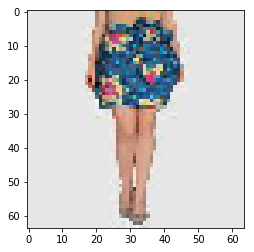

In [155]:
plt.imshow(query_image[0])

0.59942853


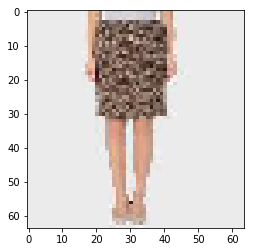

In [159]:
print(scores[1][0])
plt.imshow(scores[1][1])